# Python for Finance im Mastermodul "Termingeschäfte und Finanzderivate" - Teil 1
___
Dieses Jupyter Notebook basiert auf den Beispielen aus "Python for Finance - Second Edition" von Yuxing Yan: https://www.packtpub.com/big-data-and-business-intelligence/python-finance-second-edition
<br>
Sämtliche Beispiele sind in leicht abgewandeltet Form zu finden unter: https://github.com/PacktPublishing/Python-for-Finance-Second-Edition

### Urheberrechtsinformationen:

MIT License

Copyright (c) 2017 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
<br>
___
Version 0.1.8
<br>
Weitere Projekte sind zu finden unter: https://github.com/trh0ly

## Grundlegende Einstellungen:

Zunächst müssen die notwendigen Pakete (auch Module) importiert werden, damit auf diese zugegriffen werden kann. 

In [1]:
import numpy as np # Programmbibliothek die eine einfache Handhabung von Vektoren, Matrizen oder generell großen mehrdimensionalen Arrays ermöglicht
import matplotlib.pyplot as plt # Programmbibliothek die es erlaubt mathematische Darstellungen aller Art anzufertigen
import math # Dieses Modul wird verwendet um Skalardaten zu berechnen, z. B. trigonometrische Berechnungen.
import pylab as pl # Pylab kombiniert die Packete PyPlot und Numpy
import pandas as pd # Programmbibliothek die Hilfsmittel für die Verwaltung von Daten und deren Analyse anbietet
import scipy as sp # SciPy ist ein Python-basiertes Ökosystem für Open-Source-Software für Mathematik, Naturwissenschaften und Ingenieurwissenschaften
from scipy import stats
import datetime # Das datetime-Modul stellt Klassen bereit, mit denen Datums- und Uhrzeitangaben auf einfache und komplexe Weise bearbeitet werden können
import operator # Programmbibliothek, welche die Ausgaben übersichtlicher gestaltet
import yfinance as yf # Dieses Modul ermöglicht den Download von zuverlässigen (historischen) Marktdaten von Yahoo Finance 
from alternative_plot import alternative_smile as asplt

<Figure size 640x480 with 1 Axes>

Anschließend werden Einstellungen definiert, die die Formatierung der Ausgaben betreffen.
Hierfür wird das Modul `operator` genutzt.
Außerdem wird die Breite des im Folgenden genutzten DataFrames erhöht und die Größe der Grafiken modifiziert, welche später angezeigt werden sollen.

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

##########################################################################
#-------------------------------------------------------------------------

SCREEN_WIDTH = 125 # Breite Outputbox
SIZE = [15,10] # Größe Grafiken / Textgröße

#-------------------------------------------------------------------------
##########################################################################

pd.set_option('display.width', SCREEN_WIDTH)
centered = operator.methodcaller('center', SCREEN_WIDTH)
plt.rcParams["figure.figsize"] = SIZE[0],SIZE[1] 
plt.rcParams.update({'font.size': SIZE[0]})

## Aufgabe 1 - Payoff- und Gewinn-/Verlustfunktionen für Call- und Put-Optionen

Variablenverzeichnis:
- s = Preis der Aktie zum Fälligkeitsdatum
- b = Ausübungspreis (Basispreis)
- c = Options-Prämie für einen Call
- p = Options-Prämie für einen Put

### 1.1) Bestimmung des Payoffs einer Call-Option

Annahme: Der Ausübungspreis (Basispreis) `b` beträgt 30 GE
<br>
1. Fall: Am Zeitpunkt `t` (Fälligkeit) beträgt der Preis der Aktie `s`=25 GE -> Option wird nicht ausgeübt, da die Aktie am Markt günstiger zu haben ist
<br>
1. Fall: Am Zeitpunkt `t` (Fälligkeit) beträgt der Preis der Aktie `s`=40 GE -> Option wird ausgeübt, da die Aktie am Markt teurer ist

In [4]:
# Definition der Funktion "payoff_call", welche den Payoff einer Call-Option betimmt
def payoff_call(s, b):    
    return (s - b + abs(s - b)) / 2

# Definition der Funktion "payoff_put", welche den Payoff einer Put-Option betimmt
def payoff_put(s, b):    
    return (b - s - abs(s - b)) / 2

# Anwendung der Funktionen mit den Parametern s=25; s=40 und b=30 und Ausgabe des Ergebnisses
print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Der Payoff einer Call-Option mit den Parametern s=25 und b=30 beträgt: %d' %payoff_call(25,30)) + '| ')
print('|' + centered('Der Payoff einer Call-Option mit den Parametern s=40 und b=30 beträgt: %d' %payoff_call(40,30)) + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Der Payoff einer Put-Option mit den Parametern s=25 und b=30 beträgt: %d' %payoff_put(25,30)) + '| ')
print('|' + centered('Der Payoff einer Put-Option mit den Parametern s=40 und b=30 beträgt: %d' %payoff_put(40,30)) + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')

#-----------------------------------------------------------------------------------------------------------------------------#
|                           Der Payoff einer Call-Option mit den Parametern s=25 und b=30 beträgt: 0                          | 
|                          Der Payoff einer Call-Option mit den Parametern s=40 und b=30 beträgt: 10                          | 
#-----------------------------------------------------------------------------------------------------------------------------#
|                           Der Payoff einer Put-Option mit den Parametern s=25 und b=30 beträgt: 0                           | 
|                          Der Payoff einer Put-Option mit den Parametern s=40 und b=30 beträgt: -10                          | 
#-----------------------------------------------------------------------------------------------------------------------------#


### 1.2) Bestimmung des Payoffs einer Call-Option (Array)

Der Aktienkurs `s` zum Zeitpunkt `t` kann auch als ein Array definiert sein, sodass statt einem Wert nun mehrere zurückgegeben werden.

In [5]:
b = 20 # Ausübungspreis
s = np.arange(10,50,10) # Array mit möglichen Preisen einer Aktie

# Anwendung der Funktion mit den Parametern s=(10,20,30,40) und b=20 und Ausgabe des Ergebnisses
print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Die Payoffs der Call-Option für s=' + str(s) + ' und b=20 betragen: ' + str(payoff_call(s,b))) + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Die Payoffs der Put-Option für s=' + str(s) + ' und b=20 betragen: ' + str(payoff_put(s,b))) + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')

#-----------------------------------------------------------------------------------------------------------------------------#
|                     Die Payoffs der Call-Option für s=[10 20 30 40] und b=20 betragen: [ 0.  0. 10. 20.]                    | 
#-----------------------------------------------------------------------------------------------------------------------------#
|                   Die Payoffs der Put-Option für s=[10 20 30 40] und b=20 betragen: [  0.   0. -10. -20.]                   | 
#-----------------------------------------------------------------------------------------------------------------------------#


### 1.3) Graphische Veranschaulichung des Payoffs einer Call-Option

Auf Grundlage von 1.2) kann die Payoff-Funktion der Call-Option graphisch veranschaulicht werden.

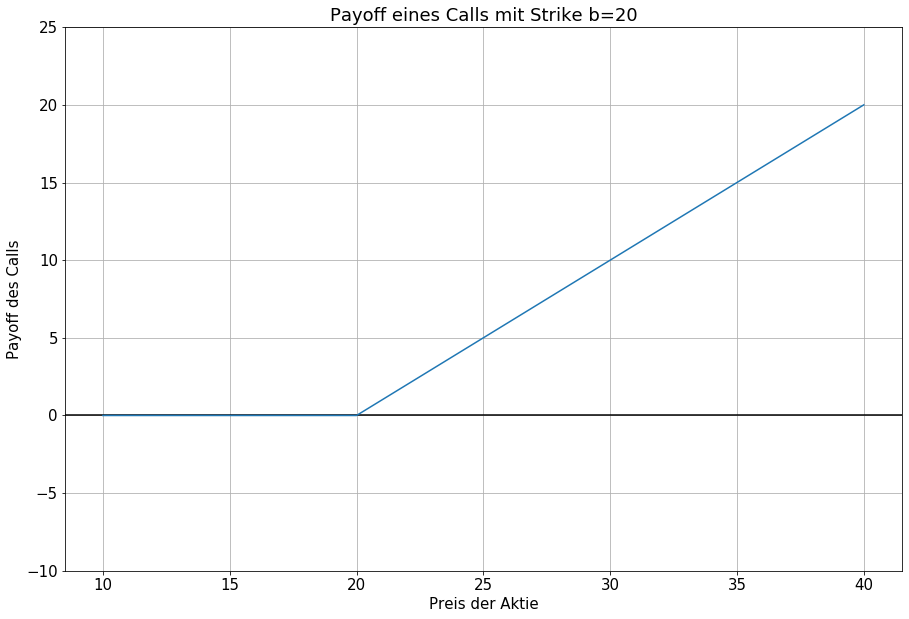

In [6]:
b = 20 # Ausübungspreis
s = np.arange(10,50,10) # Array mit möglichen Preisen einer Aktie

payoff = (s - b + abs(s - b)) / 2 # Bestimmung des Payoffs für jedes Element im Array

plt.ylim(-10, 25) # Grenzen der Y-Achse in der Grafik
plt.axhline(0, color='black') # Plotten der X-Achse
plt.plot(s, payoff) # Plotten der Payoff-Funktion (Call)
plt.title('Payoff eines Calls mit Strike b=%d' %b) # Titel der Grafik
plt.xlabel('Preis der Aktie') # Bezeichung der X-Achse
plt.ylabel('Payoff des Calls') # Bezeichnung der Y-Achse
plt.grid() # Gitternetz
plt.show() # Funktion zum anzeigen der Grafik

### 1.4) Graphische Veranschaulichung der Gewinn-/Verlustfunktion eines Käufers/Verkäuferes bei einer Call-Option

Die Payoff-Funktionen von Käufer und Verkäufer einer Call-Option verlaufen entgegengesetzt. 
Ist `b` bspw. 45 und `s`=50, ergibt sich ein Payoff i.H.v. 5 für den Käufer der Call-Option. 
Im selben Umfang erleidet der Verkäufer der Call-Option einen Verlust.
Anschließend ist noch die Optionsprämie `c` i.H.v. 2.5 GE zu verrechnen.

#-----------------------------------------------------------------------------------------------------------------------------#
|  Die Netto-Payoffs für s=[30 35 40 45 50 55 60 65] und b=45 betragen: [-2.5 -2.5 -2.5 -2.5  2.5  7.5 12.5 17.5] (Long-Call) | 
|                          Bzw. [  2.5   2.5   2.5   2.5  -2.5  -7.5 -12.5 -17.5] für den Short-Call                          | 
#-----------------------------------------------------------------------------------------------------------------------------#


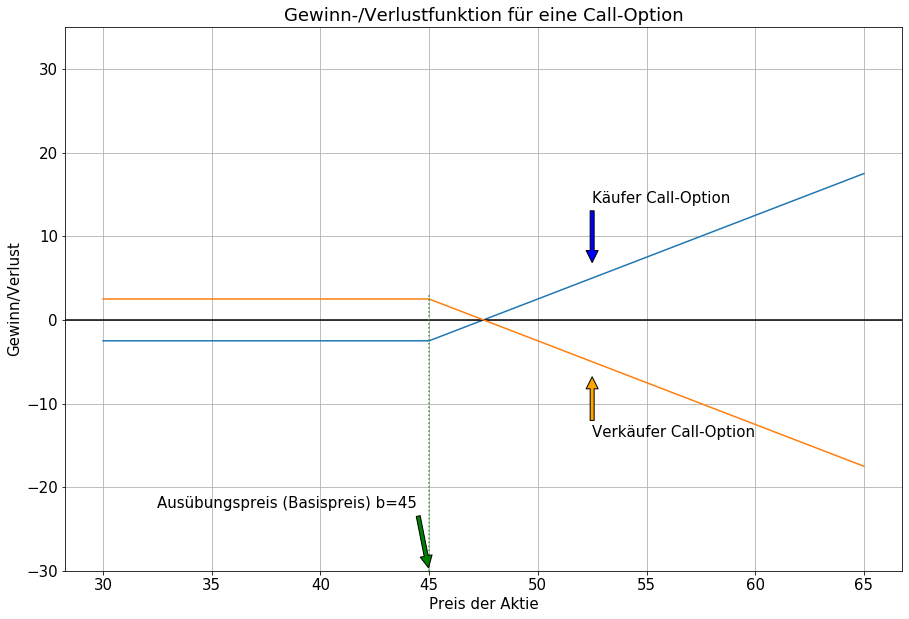

In [7]:
s = np.arange(30,70,5) # Array mit möglichen Preisen einer Aktie
b = 45 # Ausübungspreis
c = 2.5 # Options-Prämie für einen Call

print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Die Netto-Payoffs für s=' + str(s) + ' und b=%d' %b + ' betragen: ' + str(payoff_call(s,b) - c) + ' (Long-Call)') + '| ')
print('|' + centered('Bzw. ' + str(payoff_put(s,b) + c) + ' für den Short-Call') + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')

y = (s - b + abs(s - b)) / 2 - c # Bestimmung der Gewinn-/Verlustfunktion für jedes Element im Array

plt.ylim(-30,35) # Grenzen der Y-Achse in der Grafik
plt.plot(s,y) # Plotten der Gewinn-/Verlustfunktion für den Käufer der Call-Option
plt.axhline(0, color='black') # Plotten der X-Achse
plt.plot(s,-y) # Plotten der Gewinn-/Verlustfunktion für den Verkäufer der Call-Option
plt.plot([b,b],[-30,3], ':') # Plotten der Geraden zur Markierung des Ausübungspreises
plt.title('Gewinn-/Verlustfunktion für eine Call-Option') # Titel der Grafik
plt.xlabel('Preis der Aktie') # Bezeichung der X-Achse
plt.ylabel('Gewinn/Verlust') # Bezeichnung der Y-Achse
plt.grid() # Gitternetz
plt.annotate('Käufer Call-Option', xy = (52.5,6.5), xytext=(52.5,14), arrowprops=dict(facecolor='blue', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.annotate('Verkäufer Call-Option', xy = (52.5,-6.5), xytext=(52.5,-14), arrowprops=dict(facecolor='orange', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.annotate('Ausübungspreis (Basispreis) b=%d' %b, xy = (45,-30), xytext=(32.5,-22.5), arrowprops=dict(facecolor='green', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.show() # Funktion zum anzeigen der Grafik

### 1.5) Graphische Veranschaulichung der Gewinn-/Verlustfunktion eines Käufers/Verkäuferes bei einer Put-Option

Analog lässt sich dies auch für eine Put-Option veranschaulichen.

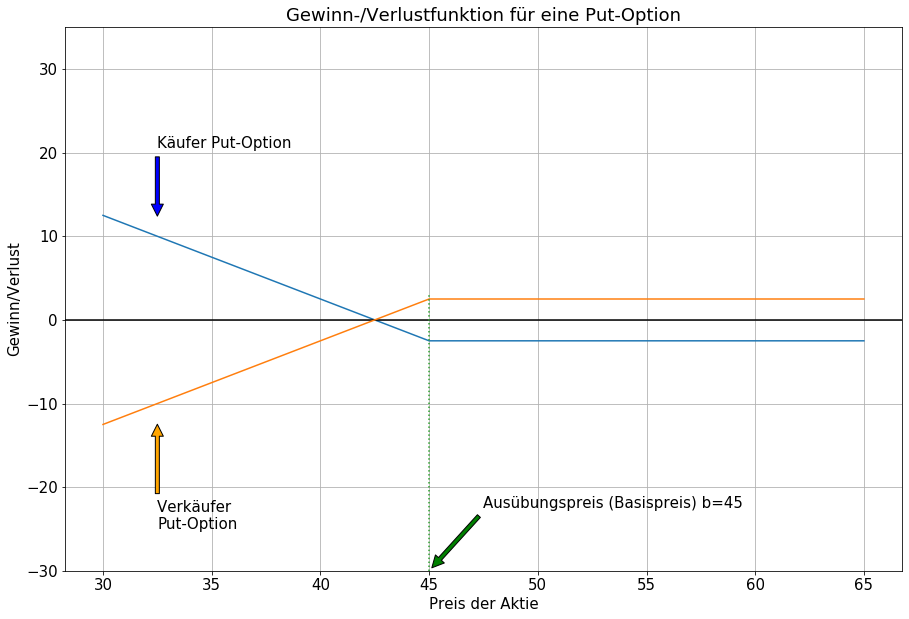

In [8]:
s = np.arange(30,70,5) # Array mit möglichen Preisen einer Aktie
b = 45 # Ausübungspreis
p = 2.5 # Options-Prämie für einen Put

y = (b - s + abs(b - s)) / 2 - p # Bestimmung der Gewinn-/Verlustfunktion für jedes Element im Array

plt.ylim(-30,35) # Grenzen der Y-Achse in der Grafik
plt.plot(s,y) # Plotten der Gewinn-/Verlustfunktion für den Käufer der Put-Option
plt.axhline(0, color='black') # Plotten der X-Achse
plt.plot(s,-y) # Plotten der Gewinn-/Verlustfunktion für den Verkäufer der Put-Option
plt.plot([b,b],[-30,3], ':') # Plotten der Geraden zur Markierung des Ausübungspreises
plt.title('Gewinn-/Verlustfunktion für eine Put-Option') # Titel der Grafik 
plt.xlabel('Preis der Aktie') # Bezeichung der X-Achse
plt.ylabel('Gewinn/Verlust')  # Bezeichnung der Y-Achse
plt.annotate('Käufer Put-Option', xy = (32.5,12), xytext=(32.5,20.5), arrowprops=dict(facecolor='blue', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.annotate('Verkäufer \nPut-Option', xy = (32.5,-12), xytext=(32.5,-25), arrowprops=dict(facecolor='orange', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil 
plt.annotate('Ausübungspreis (Basispreis) b=%d' %b, xy = (45,-30), xytext=(47.5,-22.5), arrowprops=dict(facecolor='green', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.grid() # Gitternetz
plt.show() # Funktion zum anzeigen der Grafik

## Aufagbe 2 - Ein Überblick über Verschiedene Tradingstrategien

Variablenverzeichnis:
- c = Optionsprämie für einen Call
- s = Preis der Aktie zum Fälligkeitsdatum
- tau = Aktueller Preis der Aktie
- b = Ausübungspreis (Basispreis)
- p = Options-Prämie für einen Put

### 2.1) Gedeckter Call - Eine Kombination aus einer Aktie in der Long-Position und der Short-Position eines Calls

In dieser Grafik sind die Payoff-Funktionen eines Aktienkaufs, eines gedeckten Calls und eines Calls zu sehen.
Sofern der Preis der Aktie unter 17 GE bleibt (`b`=15 + `c`=2), ist der gedeckte Call dem Aktienkauf vorzuziehen, da ein niedrigerer Preis des Underlyings ausreicht um denselben Payoff zu erzielen.
Darüber hinaus ist der alleinige Aktienkauf von Vorteil.

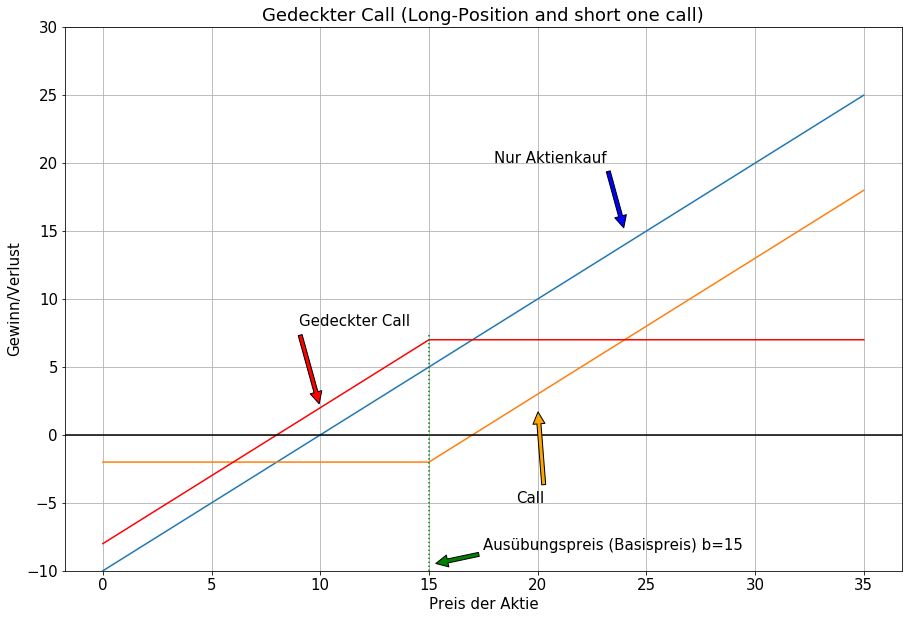

In [9]:
s = np.arange(0,40,5) # Array mit möglichen Preisen einer Aktie
b = 15 # Ausübungspreis (Basispreis)
tau = 10 # Aktueller Preis der Aktie
c = 2 # Optionsprämie für einen Call

y1 = s - tau # Nur Aktienkauf
y2 = (s - b + abs(s - b)) / 2 - c # Call
y3 = y1 - y2 # Gedeckter Call

plt.ylim(-10,30) # Grenzen der Y-Achse in der Grafik
plt.plot(s,y1) # Plotten der Funktion für den alleinigen Aktienkauf
plt.plot(s,y2) #  Plotten der Funktion für den Call
plt.plot(s,y3, color='red') # Plotten der Funktion für den gedeckten Call
plt.axhline(0, color='black') # Plotten der X-Achse
plt.plot([b,b],[-10,7.5], ':', color='green') # Plotten der Geraden zur Markierung des Ausübungspreises
plt.title('Gedeckter Call (Long-Position and short one call)') # Titel der Grafik 
plt.xlabel('Preis der Aktie') # Bezeichung der X-Achse
plt.ylabel('Gewinn/Verlust') # Bezeichnung der Y-Achse
plt.annotate('Nur Aktienkauf', xy = (24,15), xytext=(18,20), arrowprops=dict(facecolor='blue', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.annotate('Gedeckter Call', xy = (10,2), xytext=(9,8), arrowprops=dict(facecolor='red', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.annotate('Call', xy = (20,2), xytext=(19,-5), arrowprops=dict(facecolor='orange', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.annotate('Ausübungspreis (Basispreis) b=%d' %b, xy = (b + 0.2,-10 + 0.5), xytext=(17.5,-8.5), arrowprops=dict(facecolor='green', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.grid() # Gitternetz
plt.show() # Funktion zum anzeigen der Grafik

### 2.2) Straddle - Kauf eines Calls und eines Puts mit demselben Ausübungspreis

Bei einem Straddle erfolgt der Kauf eines Calls und eines Puts mit demselben Ausübungspreis.
Anwendung findet diese Optionsstrategie bspw., wenn nicht abgeschätzt werden kann welche Auswirkungen (positiv oder negativ) ein zukünftiges Unternehmensereignis hat.
Sofern sich der Preis der Aktie in eine beliebige Richtung bewegt, profitiert der Halter der beiden Positionen.
Der Break-Even-Point wird erreicht, sobald die Auszahlung die Kosten der Optionsprämie `c` und `p` deckt.

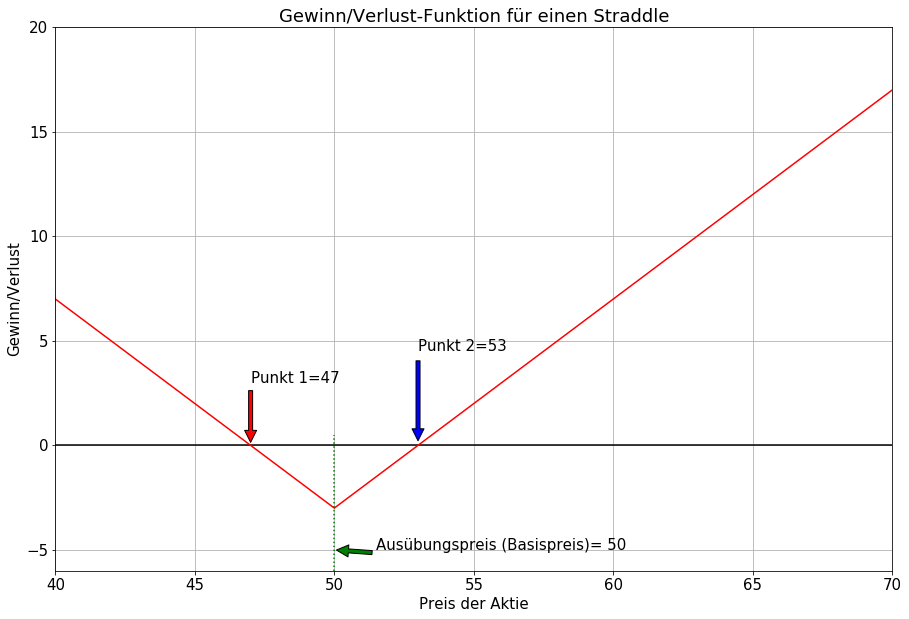

In [10]:
s = np.arange(30,80,5) # Array mit möglichen Preisen einer Aktie
b = 50 # Ausübungspreis
c = 2 # Optionsprämie für einen Call
p = 1 # Optionsprämie für einen Put 

call = (s - b + abs(s - b)) / 2 - c # Call
put = (b - s + abs(b - s)) / 2 - p # Put
straddle = call + put # Straddle

plt.xlim(40,70) # Grenzen der X-Achse in der Grafik
plt.ylim(-6,20) # Grenzen der Y-Achse in der Grafik
plt.axhline(0, color='black') # Plotten der X-Achse
plt.plot(s,straddle,'r') # Plotten der Funktion für den Straddle
plt.plot([b,b],[-6,0.5], ':', color='green') # Plotten der Geraden zur Markierung des Ausübungspreises
plt.title('Gewinn/Verlust-Funktion für einen Straddle') # Titel der Grafik 
plt.xlabel('Preis der Aktie') # Bezeichung der X-Achse
plt.ylabel('Gewinn/Verlust') # Bezeichnung der Y-Achse
plt.annotate('Punkt 1=' + str(b-c-p), xy = (b-p-c,0), xytext=(b-p-c,3), arrowprops=dict(facecolor='red', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.annotate('Punkt 2=' + str(b+c+p), xy = (b+c+p,0), xytext=(b+c+p,4.5), arrowprops=dict(facecolor='blue', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.annotate('Ausübungspreis (Basispreis)= %d' %b, xy = (50,-5), xytext=(51.5,-5), arrowprops=dict(facecolor='green', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.grid() # Gitternetz
plt.show() # Funktion zum anzeigen der Grafik

### 2.3) Butterfly mit Calls

Der Kauf zweier Calls mit den Ausübungspreisen `b1`=50 GE und `b3`=60 GE und der Verkauf eines Calls mit dem Ausübungspreis `b2`=(`b1`+`b3`/2)=55 GE mit derselben Fälligkeit für dieselbe Aktie wird als Butterfly bezeichnet.
Die jeweiligen Prämien der Calls betragen: `c1`=10 GE, `c2`=7 GE, `c3`=5 GE.
Die Gewinn-/Verlustfunktion dieser Optionsstratiegie lässt sich wie folgt darstellen:

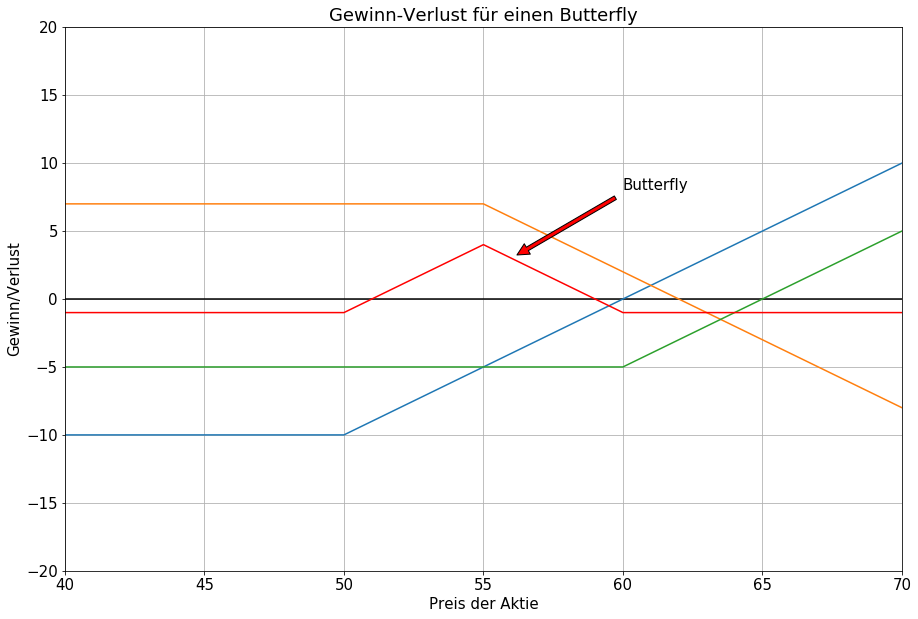

In [11]:
s = np.arange(30,80,5) # Array mit möglichen Preisen einer Aktie
b1 = 50; c1 = 10 # Ausübungspreis 1, Optionsprämie für einen Call 1
b2 = 55; c2 = 7 # Ausübungspreis 2, Optionsprämie für einen Call 2
b3 = 60; c3 = 5 # Ausübungspreis 3, Optionsprämie für einen Call 3

y1 = (s - b1 + abs(s - b1)) / 2 - c1 # Call blau (Long)
y2 = (s - b2 + abs(s - b2)) / 2 - c2 # Call orange (Short)
y3 = (s - b3 + abs(s - b3)) / 2 - c3 # Call grün (Long)
butterfly = y1 + y3 - 2 * y2 # Butterfly

plt.xlim(40,70) # Grenzen der X-Achse in der Grafik
plt.ylim(-20,20) # Grenzen der Y-Achse in der Grafik
plt.axhline(0, color='black') # Plotten der X-Achse
plt.plot(s,y1) # Plotten der Funktion für blauen Call
plt.plot(s,-y2) # Plotten der Funktion für den orangenen Call
plt.plot(s,y3) # Plotten der Funktion für den grünen Call 
plt.plot(s,butterfly,'r') # Plotten der Funktion für den Butterlfy
plt.title('Gewinn-Verlust für einen Butterfly') # Titel der Grafik 
plt.xlabel('Preis der Aktie') # Bezeichung der X-Achse
plt.ylabel('Gewinn/Verlust') # Bezeichnung der Y-Achse
plt.annotate('Butterfly', xy = (56,3), xytext=(60,8), arrowprops=dict(facecolor='red', shrink=0.05)) # Beschriftung und Markierung der Funktion mit einem Pfeil
plt.grid() # Gitternetz
plt.show() # Funktion zum anzeigen der Grafik

## Aufgabe 3 - Put-Call-Parität und deren graphische Repräsentation

Variablenverzeichnis:
- b = Ausübungspreis (Basispreis)
- roh = risikoloser Zinssatz
- t = Fälligkeit in Jahren
- s = Preis der Aktie zum Fälligkeitsdatum

### 3.1) Berücksichtigung des Present Value

Annahme: Es wird ein Call mit einem Ausübungspreis i.H.v. 20 GE und einer Fälligkeit von drei Monaten betrachtet.
Der risikolose Zinssatz beträgt 5%, sodass sich der folgende Barwert ergbit:

In [12]:
b = 20 # Ausübungspreis (Basispreis)
t = 3 / 12 # Fälligkeit 
roh = 0.05 # Risikoloser Zinssatz

b1 = b * math.exp(- roh * t) # Diskontierter Ausübungspreis
b1 = round(b1,2) # Gerundeter diskontierter Ausübungspreis

print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Der Present Value des Ausübungspreises i.H.v. %d' %b + ' GE beträgt nach %f' %t + ' Jahren : ' + str(b1) + ' GE') + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')

#-----------------------------------------------------------------------------------------------------------------------------#
|                 Der Present Value des Ausübungspreises i.H.v. 20 GE beträgt nach 0.250000 Jahren : 19.75 GE                 | 
#-----------------------------------------------------------------------------------------------------------------------------#


### 3.2) Graphische Veranschaulichung der Put-Call Parität

In der folgenden Grafik wird veranschaulicht, dass zwischen Put- und Call-Optionen eine feste Beziehung besteht. 
Sofern der Put und der Call sich auf denselben Basiswert beziehen, den selben Strike haben und eine identische Laufzeit ausweisen, entspricht der Call + der Barwert des abgezinsten Strikes (Cash) dem Put + dem Kassapreis des Barwertes (Aktie).
Beide Stragegien führen somit zum selben Ergebnis.
<br>
1. Fall: Bei einem Aktienpreis von unter 20 GE wird der Call auf diese Aktie nicht ausgeübt, das vorhandene Cash wird behalten; bei einem Aktienpreis von über 20 GE wird der Call auf diese Aktie unter Verwendung des Cashs ausgeübt -> Es wird das Maximum aus Aktienpreis und Cash ausgezahlt
<br>
2. Fall: Bei einem Aktienpreis von unter 20 GE wird der Put auf diese Aktie ausgeübt, es werden 20 GE ausgezahlt; bei einem Aktienpreis von über 20 GE wird diese behalten -> Es wird das Maximum aus dem Payoff des Puts und dem Aktienpreis ausgezahlt

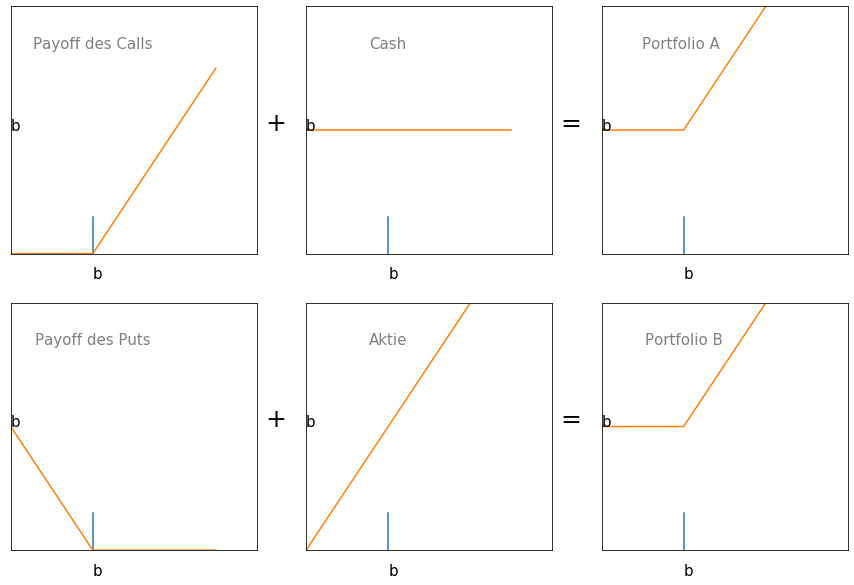

In [13]:
b = 10 # Ausübungspreis (Basispreis)
s = np.arange(0,30,5) # Array mit möglichen Preisen einer Aktie

call_payoff = (s - b + abs(s - b)) / 2 # Payoff des Calls
put_payoff = (b - s + abs(b - s)) / 2  # Payoff des Puts
cash = np.zeros(len(s)) + b # Cash

# Funktion, welche die Platzierrung und Formatierung der Grafik vereinfacht
def graph(text, text2=''):
    pl.xticks(()) # Blendet die Beschriftung der X-Achse aus
    pl.yticks(()) # Blendet die Beschriftung der Y-Achse aus
    pl.xlim(0,30) # Grenzen der X-Achse in der Grafik
    pl.ylim(0,20) # Grenzen der Y-Achse in der Grafik
    pl.plot([b,b],[0,3]) # Plottet die senkrechte, blaue Gerade
    pl.text(b,-2,'b') # Plottet das "X" auf der Y-Achse
    pl.text(0,b,'b')  # Plottet das "X" auf der X-Achse
    pl.text(b,b * 1.7, text, ha='center', va='center', size=15, alpha=0.5) # Plottet und Positioniert die Beschriftung der jeweiligen Grafik
    pl.text(-5,10,text2,size=25) # Plottet die Plus- und die Minuszeichen

pl.subplot(2,3,1); graph('Payoff des Calls'); pl.plot(s, call_payoff) # Plottet die Grafik mit dem Payoff des Calls (Oben)
pl.subplot(2,3,2); graph('Cash', '+'); pl.plot(s, cash) # Plottet die Grafik mit dem Cash (Oben)
pl.subplot(2,3,3); graph('Portfolio A ', '='); pl.plot(s, cash + call_payoff) # Plottet die Grafik mit der Kombination aus Call und Cash (Oben)
pl.subplot(2,3,4); graph('Payoff des Puts'); pl.plot(s, put_payoff)  # Plottet die Grafik mit dem Payoff des Puts (Unten)
pl.subplot(2,3,5); graph('Aktie', '+'); pl.plot(s, s) # Plottet die Grafik mit der Aktie (Unten)
pl.subplot(2,3,6); graph('Portfolio B', '='); pl.plot(s, s + put_payoff)  # Plottet die Grafik mit der Kombination aus Put und Aktie (Unten)
pl.show() # Funktion zum anzeigen der Grafik

## Aufagbe 4 - Implizite Volatilität

Variablenverzeichnis:
- s = Preis der Aktie zum Fälligkeitsdatum
- b = Ausübungspreis (Basispreis)
- t = Fälligkeit in Jahren
- roh = risikofreier Zinssatz
- sigma = Volatilität der Aktie, (annualisierte Standardabweichung der Renditen)
- c = Optionsprämie für einen Call
- p = Options-Prämie für einen Put

### 4.1) Schätzung des Preises einer europäischen Call-Option

Basierend auf dem Black-Scholes-Merton-Modell lässt sich der Preis einer europäischen Call-Option in Python wie folgt schätzen: 
<br>
Annahme: 
s=40;
b=40;
t=0.5;
roh=0.05;
sigma=0.25

In [14]:
# Definition der Funktion "bs_call", welche die zu entrichtende Prämie einer Call-Option betimmt
def bs_call(s,b,t,roh,sigma):
    d1 = (math.log(s / b) + (roh + sigma * sigma / 2) * t ) / (sigma * math.sqrt(t)) # Berechnung d1
    d2 = d1 - sigma * math.sqrt(t) # Berechnung d2
    return s * stats.norm.cdf(d1) - b * math.exp(-roh * t) * stats.norm.cdf(d2) # Rückgabe des in dieser Zeile berechneten Wertes

# Ausführung der Funktion
price = bs_call(40,40,0.5,0.05,0.25)

# Ausgabe des Ergebnises
print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Der Preis der europäischen Call-Option beträgt %f' %price + ' GE') + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')

#-----------------------------------------------------------------------------------------------------------------------------#
|                                  Der Preis der europäischen Call-Option beträgt 3.304006 GE                                 | 
#-----------------------------------------------------------------------------------------------------------------------------#


### 4.2) Schätzung der impliziten Volatilität einer europäischen Option bei sonst gegebenen Parametern

Annahme: Gegeben sind: s=40, b=40, t=0.5, roh=0.05, und c=3.30.
Gesucht ist sigma, welches nach obiger Rechnung zufolge den Wert 0.25 annehmen sollte.

#### Betrachtung einer Call-Option :

Der Funktion "implied_vol_calls()" werden die bekannten Parameter s,b,t,roh und c übergeben.
In jeder der 100 Iteration wird systematisch ein sigma bestimmt auf Basis dessen die Prämie des Calls berechnet wird.
Die Berechnung wird gestoppt, sobald die absolute Differenz zwischen dem so berechneten und dem vorgegebenen Call-Preis einen kritischen Wert unterschreitet.
In diesem Fall wurder dieser kritische Wert auf 0.01 GE festgelegt.

In [15]:
# Definition der Funktion "implied_vol_calls", welche die implizite Volatilität einer Call-Option betimmt
def implied_vol_calls(s,x,t,roh,c):
    # Führe die folgende Berechnung 100 mal durch
    for i in range(100):
        sigma = 0.005 * (i + 1) # Bestimmung sigma
        d1 = (math.log(s / x) + (roh + sigma * sigma / 2) * t ) / (sigma * math.sqrt(t)) # Berechnung d1
        d2 = d1 - sigma * math.sqrt(t) # Berechnung d2
        diff = c - (s * stats.norm.cdf(d1) - x * math.exp(-roh * t) * stats.norm.cdf(d2)) # Berechnung Differenz zwischen gegebenen Call-Preis (3.30) und bestimmten Call-Preis
        # Abbruchkriterium
        if abs(diff) <= 0.01:
            return (i, sigma, diff) # Rückgabe des in dieser Zeile berechneten Wertes

# Ausführung der Funktion
i, sigma, diff = implied_vol_calls(40,40,0.5,0.05,3.3) 

# Ausgabe des Ergebnises
print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Iteration=%d' %i + ', Sigma=%f' %sigma + ', Differenz geschätzter Call-Preis zum gegeben=%f' %diff) + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')

#-----------------------------------------------------------------------------------------------------------------------------#
|                     Iteration=49, Sigma=0.250000, Differenz geschätzter Call-Preis zum gegeben=-0.004006                    | 
#-----------------------------------------------------------------------------------------------------------------------------#


####  Betrachtung einer Put-Option:

Im folgenden wird eine Put-Option betrachtet, sodass hierbei die Put-Prämie `p`=1.501 anstelle einer Call-Prämie als letzte Input-Variable an die Funktion übergeben wird. 
Innerhalb der Funktion werden zunächst Ausgangswerte initialisiert, welche in den sich anschließenden Rechenoperation überschrieben werden.
Sobald das Abbruchkriterium erreicht wird, werden die berechneten Werte zurückgebenen.

In [16]:
def implied_vol_put_min(s,b,t,roh,p):
    implied_vol = 1.0 # Initialisierung der impliziten Volatilität 
    min_value = 100.0 # Initialisierung des Ausgangswertes für das Abbruchkriteriums
    
    # Führe die folgende Berechnung 10000 mal durch
    for i in range(1,10000):
        sigma = 0.0001 * (i + 1) # Bestimmung sigma 
        d1 = (math.log(s / b) + (roh + sigma * sigma / 2) * t ) / (sigma * math.sqrt(t)) # Berechnung d1
        d2 = d1 - sigma * math.sqrt(t) # Berechnung d2
        put = b * math.exp(-roh * t) * stats.norm.cdf(-d2) - s * stats.norm.cdf(-d1) # Berechnung der Prämie des Puts
        abs_diff = abs(put - p) # Berechnung der absoluten Diffnerenz
        # Abbruchkriterium
        if abs_diff < min_value:
            min_value = abs_diff # Bestimmung des neuen Wertes für das Abbruchkriteriums
            implied_vol = sigma # Bestimmung der impliziten Volatilität 
            k = i # Bestimmung der Iteration
        put_out = put # Bestimmung des Puts
    return(k, implied_vol, put_out, min_value) # Rückgabe der berechneten Wertes

# Ausführung der Funktion
k, implied_vol, put_out, min_value = implied_vol_put_min(40,40,1,0.1,1.501)

# Ausgabe des Ergebnises
print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Iteration=%d' %k + ', Implizite Volatilität=%f' %implied_vol + ', Payoff Put=%f' %put_out + ', Absolute Differenz=%f' %min_value) + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')

#-----------------------------------------------------------------------------------------------------------------------------#
|              Iteration=1999, Implizite Volatilität=0.200000, Payoff Put=12.751880, Absolute Differenz=0.000367              | 
#-----------------------------------------------------------------------------------------------------------------------------#


## Aufagbe 5 - Volatility smile and skewness

In der folgenden Grafik wird der Zusammenhang zwischen der impliziten Volatilität und dem Strike-Preis veranschaulicht.
Das Volatility Skew wird durch das Verhältnis von Angebot und Nachfrage bestimmter Optionen beeinflusst und gibt Aufschluss darüber, ob Fondsmanager vorwiegend Calls oder Puts zeichnen.

#-----------------------------------------------------------------------------------------------------------------------------#
|                                        Es sind die folgenden Unternehmen betrachtbar:                                       | 
#-----------------------------------------------------------------------------------------------------------------------------#
0) IBM
1) Apple
2) VW
3) BASF
4) Microsoft
5) Bayer
#-----------------------------------------------------------------------------------------------------------------------------#
|                                Bitte geben Sie namentlich ein Unternehmen aus der Liste ein:                                | IBM
#-----------------------------------------------------------------------------------------------------------------------------#
|                               Für IBM sind Optionen mit den folgenden Fälligkeiten verfügbar:                               | 
#---------------------------------------------

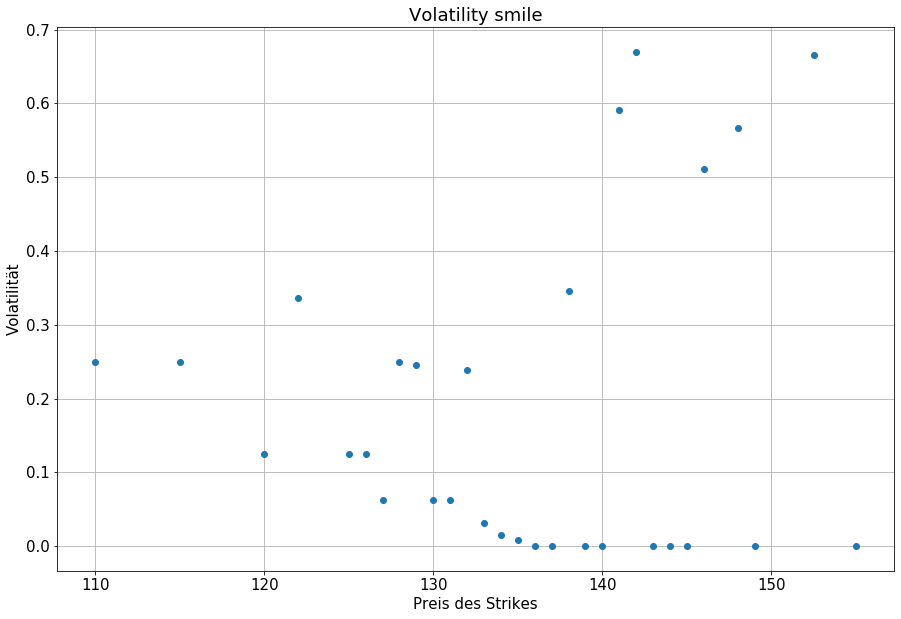

#-----------------------------------------------------------------------------------------------------------------------------#


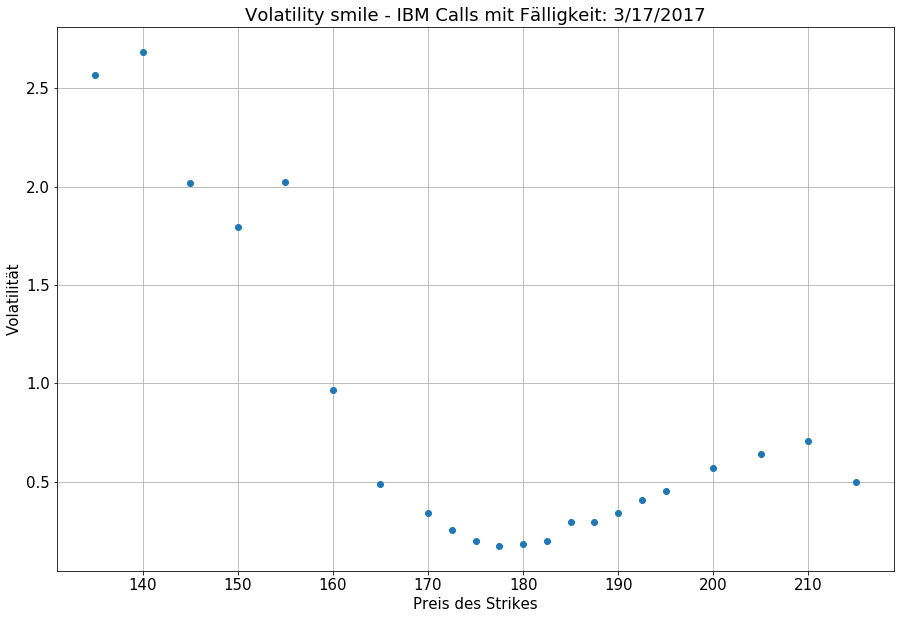

In [17]:
# Dictonary in welchem die Ticker-Kürzel hinterlegt sind
AG_Dict = {"IBM": 'IBM',
           "Apple": 'AAPL',
           "VW": 'VOW.DE', # Keine Daten
           "BASF": 'BAS.DE', # Keine Daten
           "Microsoft": 'MSFT',
           "Bayer": 'BAYRY'} # Keine Daten

#------------------------------------------------------------
# Abfrage zur Auswahl des Unternehmens

print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Es sind die folgenden Unternehmen betrachtbar:') + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')
counter = 0
for key, value in AG_Dict.items() :
    print(str(counter) + ') ' + str(key))
    counter += 1
print('#' + SCREEN_WIDTH * '-' + '#')
My_AG = input('|' + centered('Bitte geben Sie namentlich ein Unternehmen aus der Liste ein:') + '| ')

#------------------------------------------------------------
# Ausgabe verfügbare Fälligkeiten

AG = yf.Ticker(AG_Dict[My_AG])
print('#' + SCREEN_WIDTH * '-' + '#')
print('|' + centered('Für ' + str(My_AG) + ' sind Optionen mit den folgenden Fälligkeiten verfügbar:') + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')
maturitys = AG.options
counter = 0
for maturity in maturitys:
    print(str(counter) + ') ' + str(maturity))
    counter += 1
print('#' + SCREEN_WIDTH * '-' + '#')

#------------------------------------------------------------
# Wahl eines Fälligkeitstermins

My_Date = int(input('|' + centered('Bitte geben Sie die Nummer der gewünschten Fälligkeit ein:') + '| '))
print('#' + SCREEN_WIDTH * '-' + '#')
AG_options = AG.option_chain(AG.options[My_Date])
data = AG_options.calls
data = AG_options.puts

#------------------------------------------------------------
# Vereinfachter DataFrame mit Informationen zu den Kontrakten

stock_overview = pd.DataFrame({'Bezeichnung':data['contractSymbol'], 'Strike':data['strike'], 'Bid':data['bid'], 'Ask':data['ask'], 'Volatilität':data['impliedVolatility'], 'InTheMoney':data['inTheMoney']})
print('|' + centered('Ausgewählt wurde ' + str(My_AG) + ' zur Fälligkeit ' + str(AG.options[My_Date]) + '.') + '| ')
print('#' + SCREEN_WIDTH * '-' + '#')
print(stock_overview)
print('#' + SCREEN_WIDTH * '-' + '#')

#------------------------------------------------------------
# Generierung der Grafik für das Volatility Smile 

x = data['strike'] # Speichere die eingelesenen Daten aus der Spalte 'Strike' als die Variable x
y = list(data['impliedVolatility']) # Überführe die eingelesenen Daten aus der Spalte 'Implied Volatility' in eine Liste
plt.title('Volatility smile') # Titel der Grafik
plt.ylabel('Volatilität') # Beschriftung Y-Achse
plt.xlabel('Preis des Strikes') # Beschriftung X-Achse
plt.plot(x,y,'o') # Plotten der Datenpunkte
plt.grid() # Gitternetz
plt.show() # Funktion zum anzeigen der Grafik

#------------------------------------------------------------------------------------------------------------------------
#########################################################################################################################
#------------------------------------------------------------------------------------------------------------------------
# Referenzfall

print('#' + SCREEN_WIDTH * '-' + '#')
asplt()